In [1]:
## run notebooks
#%run "../Notebooks/initialization.ipynb"
%run "../Notebooks/Stitching_functions.ipynb"
%run "../Notebooks/Visualization_functions.ipynb"
%run "../Notebooks/Downsampling_and_outliers_functions.ipynb"
%run "../Notebooks/Meshing_functions.ipynb"
%load_ext autoreload

loaded variables: 
myparams, myconfiguration_file


# load solid file in extension 

[Open3D WARNING] GLFW Error: The GLFW library is not initialized


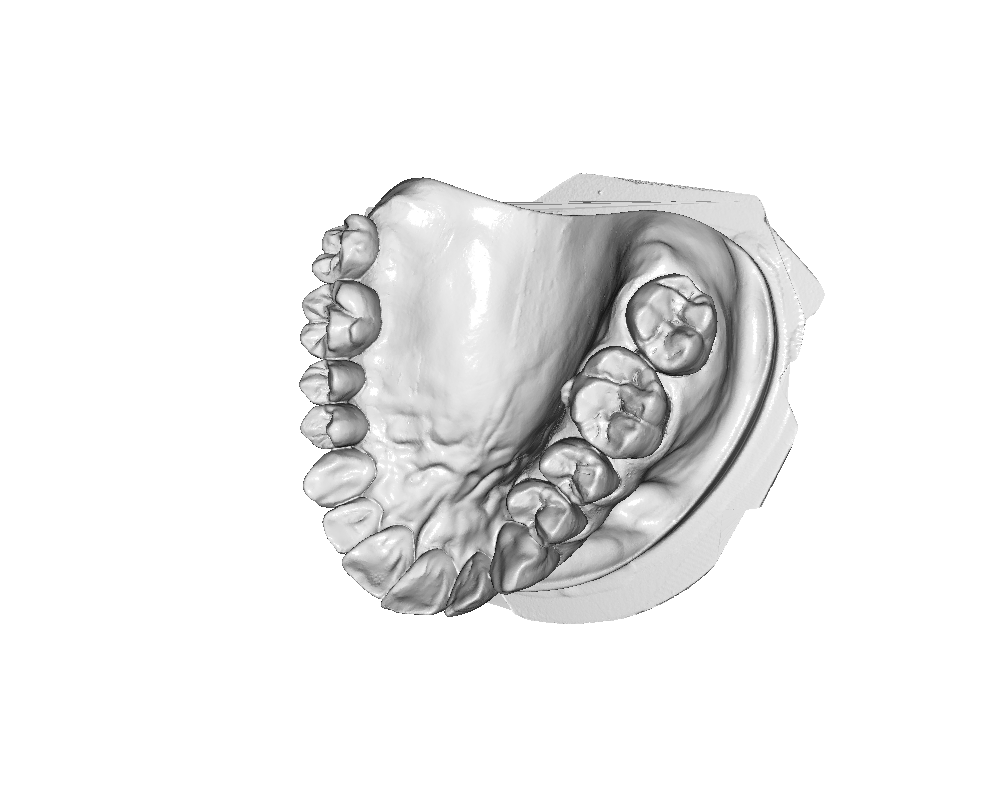

In [2]:
mesh = o3d.io.read_triangle_mesh("dental.stl")
mesh.compute_vertex_normals()
#o3d.visualization.draw_geometries([mesh], mesh_show_back_face=True)
custom_draw_geometry([mesh],
                     mytitle = "original model",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = False,
                     rotate = True)
Im(filename=last_file(".png"),
  width = 500, height = 400) 

# convert it to point cloud

In [3]:
pcd = o3d.geometry.PointCloud()
pcd.points = mesh.vertices
pcd.colors = mesh.vertex_colors
pcd.normals = mesh.vertex_normals

# visualize it 

[Open3D WARNING] GLFW Error: The GLFW library is not initialized


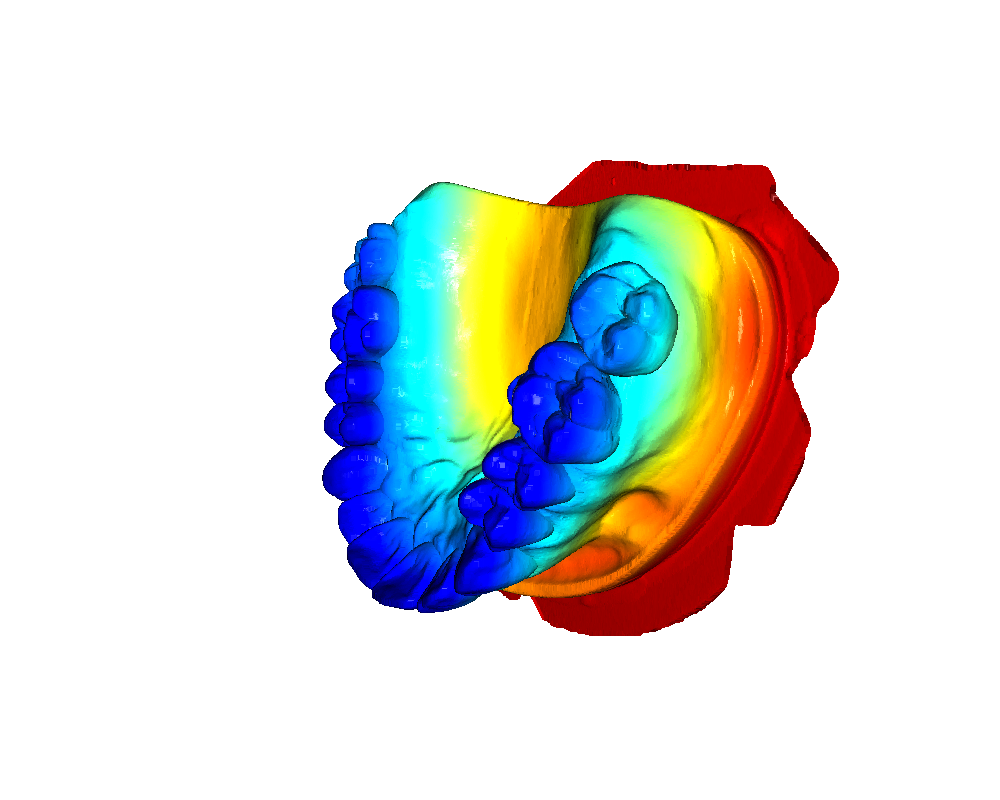

In [4]:
custom_draw_geometry(pcd,
                     mytitle = "original model",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = False,
                     rotate = True)
Im(filename=last_file(".png"),
  width = 500, height = 400) 

## load our own best point cloud

[Open3D WARNING] Read JSON failed: unable to open file: ./ScreenCamera_2021-01-13-01-16-57.json
[Open3D WARNING] [ViewControl] ConvertFromPinholeCameraParameters() failed because window height and width do not match.
[Open3D WARNING] Read JSON failed: unable to open file: ./RenderOption_2021-01-12-23-23-51.json
[Open3D WARNING] GLFW Error: The GLFW library is not initialized


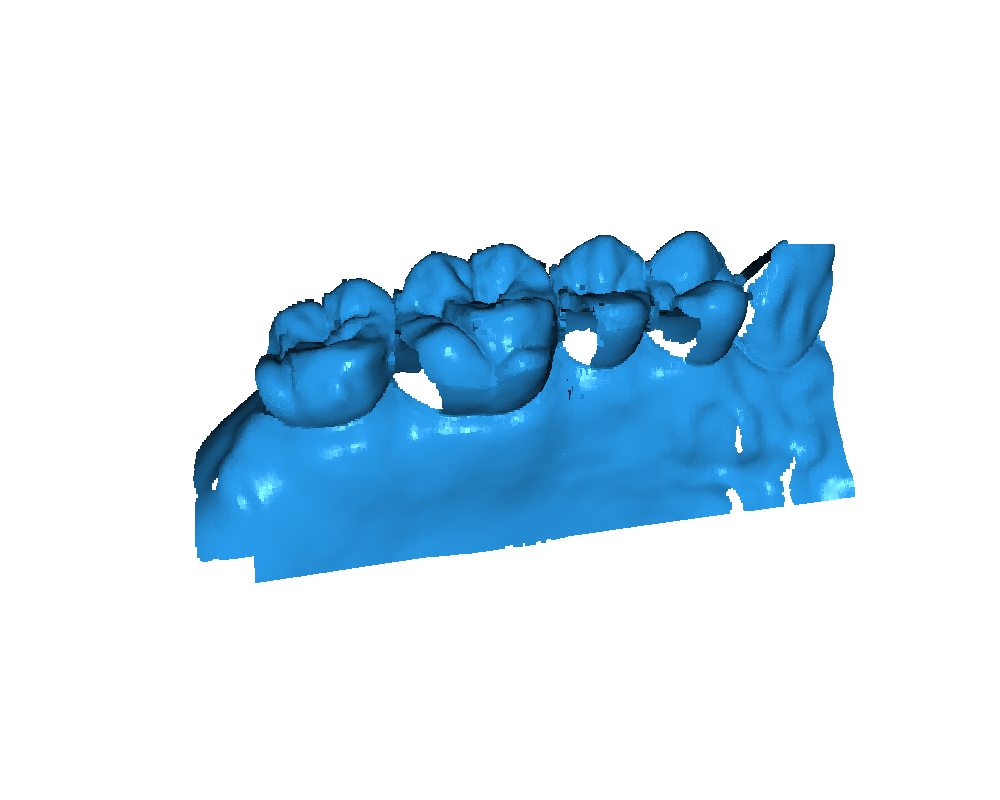

In [30]:
#load point cloud
## TODO load the clean one 
st_pcd= o3d.io.read_point_cloud("complete_cluster_3.pcd")

custom_draw_geometry(st_pcd,
                     mytitle = "both",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = False,
                     rotate = "interactive",
                     onewindow = True)
Im(filename=last_file(".png"),
  width = 500, height = 400) 

[Open3D DEBUG] Precompute Neighbours
[Open3D DEBUG] Done Precompute Neighbours
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 354357

point cloud has 354357 clusters
there are 488502 points in all clusters
there are 0 points identified as ouliers 
there are 20 points in the biggest cluster 


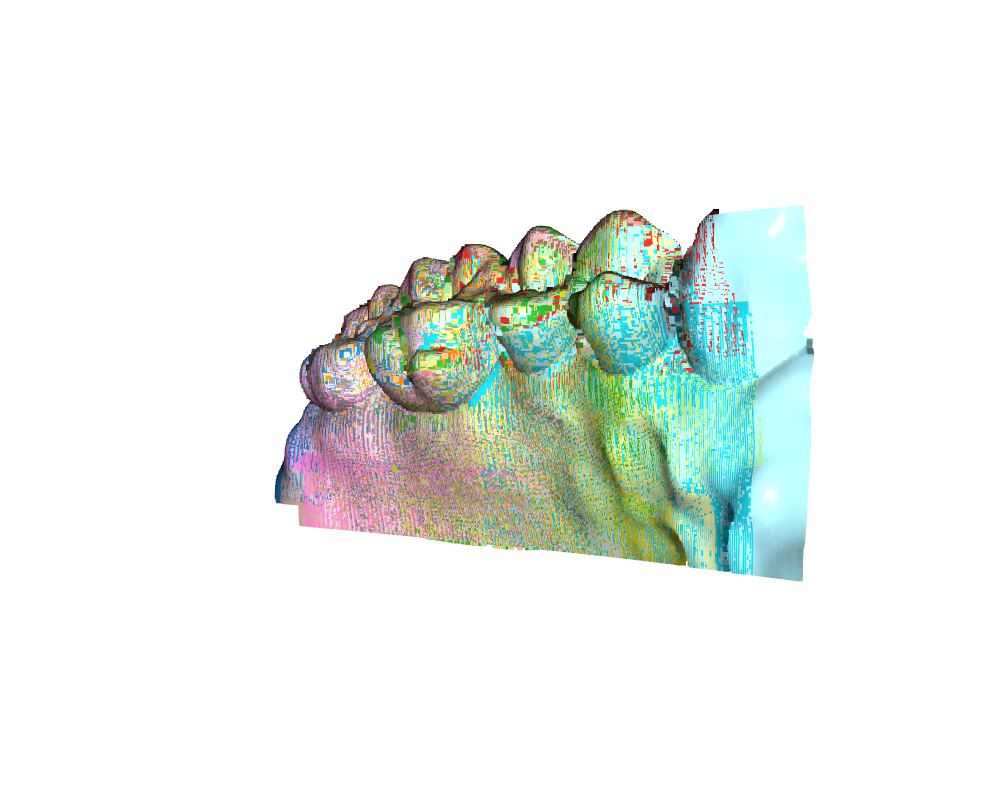

In [6]:
st_pcd_cluster = clustering(  st_pcd,
                                myeps=0.02, 
                                mymin_points=1,

                                mytitle = mytimestamp() +"clustering",
                                params =myparams, 
                                configuration_file = myconfiguration_file, 
                                take_screen_shot = True,
                                rotate = False, # with this true the screenshot its black
                              
                              
                                #statements
                                print_statement = True,
                                visualization_on = True)
Im(filename=last_file(".png"),
  width = 500, height = 400) 

In [7]:
#"Statistical_outlier_removal"
my_nb_neighbors=[10,10,100,100,1000,1000]
my_std_ratio=[0.01,0.1,0.1,0.2,0.1,0.2]
myn= len(my_std_ratio)

for i in range(myn):
    statistical_outlier_removal(st_pcd,my_nb_neighbors[i],my_std_ratio[i])


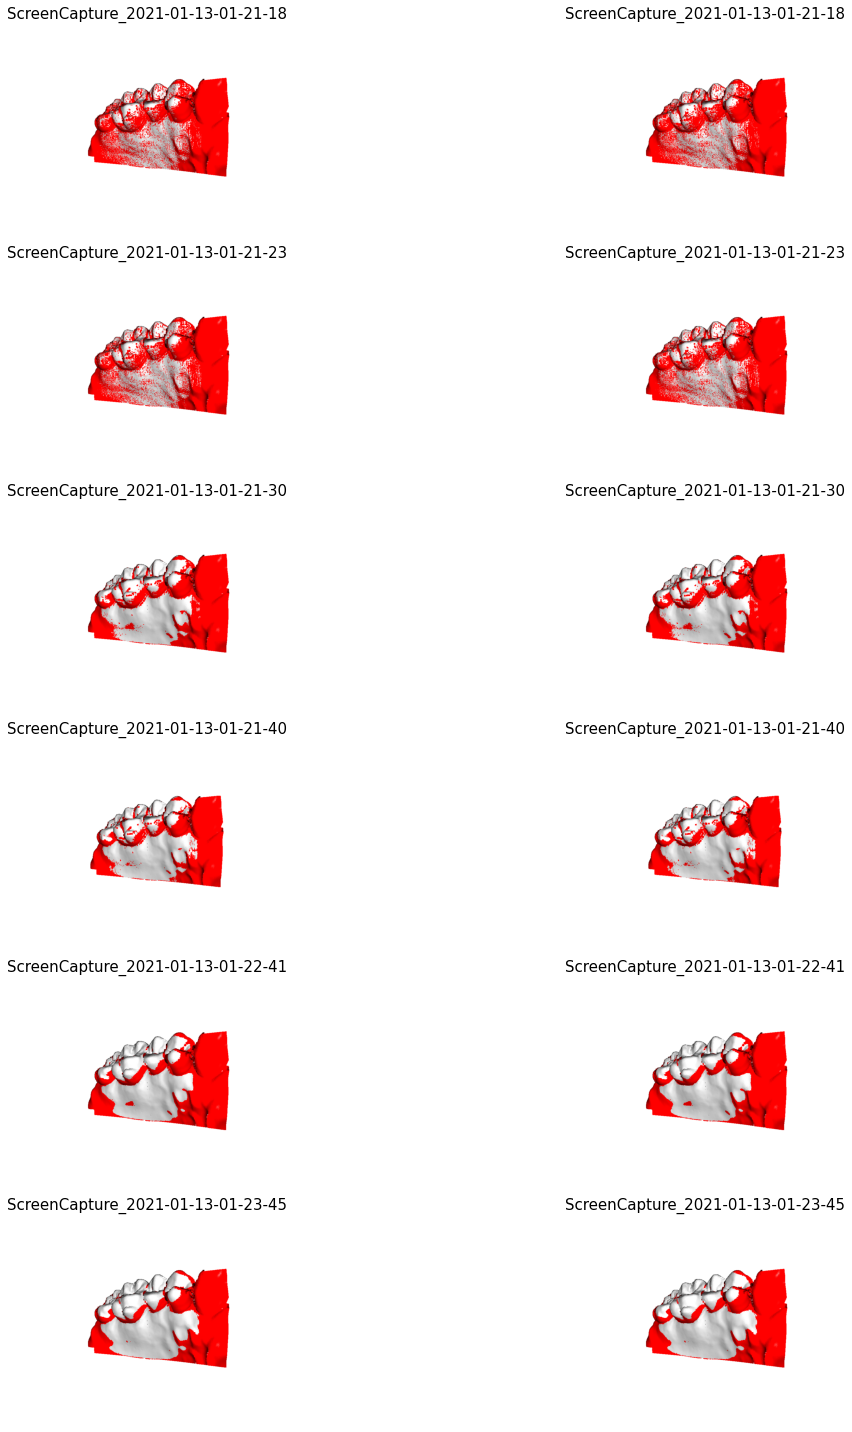

In [8]:
paths_temp = last_n_files_containing("ScreenCapture",n= myn, extension = '.png')
img_temp = [cv2.imread(path) for path in paths_temp]

rows = myn
cols = 2
fig, axes = plt.subplots(nrows=rows,ncols=cols,squeeze=False,figsize=(20, 20))
for i in range(rows):
    for j in range(cols):
        axes[i][j].imshow(plt_format(img_temp[i]))
        axes[i][j].set_title(paths_temp[i][2:-4],fontsize = 15)
        axes[i][j].axis('off')

fig.tight_layout()    
plt.show()

## do global and icp and count number of overlapping points

In [9]:
labels_stitches = ["model_pc","stitched_pc"]
list_stitches = [pcd,st_pcd]
color_stitches = [[1, 0.706, 0],[0, 0.651, 0.929]]
ewpointcloud = list_stitches[0].paint_uniform_color([1, 0.706, 0])+list_stitches[1].paint_uniform_color([0, 0.651, 0.929])

[Open3D WARNING] Read JSON failed: unable to open file: ./ScreenCamera_2021-01-13-01-16-57.json
[Open3D WARNING] [ViewControl] ConvertFromPinholeCameraParameters() failed because window height and width do not match.
[Open3D WARNING] Read JSON failed: unable to open file: ./RenderOption_2021-01-12-23-23-51.json
[Open3D WARNING] GLFW Error: The GLFW library is not initialized


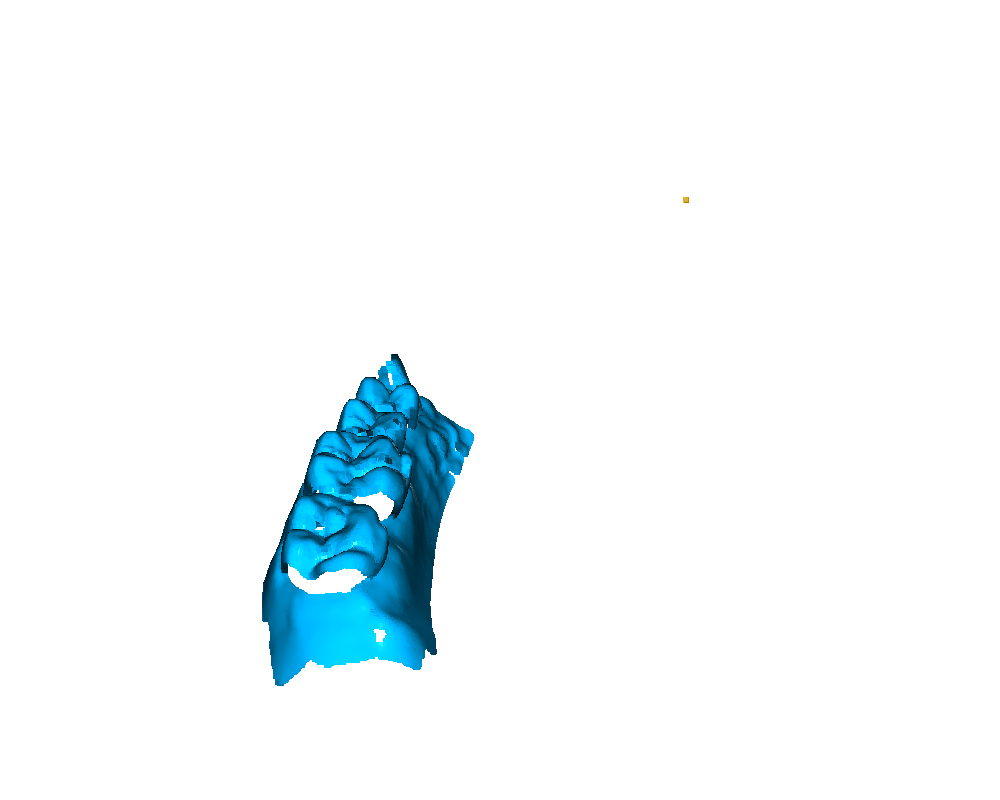

In [29]:
# plot a list of geometries
custom_draw_geometry(ewpointcloud,
                     mytitle = "both",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = False,
                     rotate = "interactive",
                     onewindow = True)
Im(filename=last_file(".png"),
  width = 500, height = 400) 

we notice that the scale is out. how to rescale? we need for sure a scaling factor.

## try to apply an ad hoc transformation to rescale

In [11]:
trans_scale = np.asarray([[1000.0, 0.0, 0.0, 0.0], 
                        [0.0, 1000.0, 0.0, 0.0],
                        [0.0, 0.0, 1000.0, 0.0], 
                        [0.0, 0.0, 0.0, 1.0]])

In [12]:
temp_pcd = copy.deepcopy(pcd)
temp_pcd.transform(trans_scale)

PointCloud with 3379896 points.

[Open3D WARNING] GLFW Error: The GLFW library is not initialized


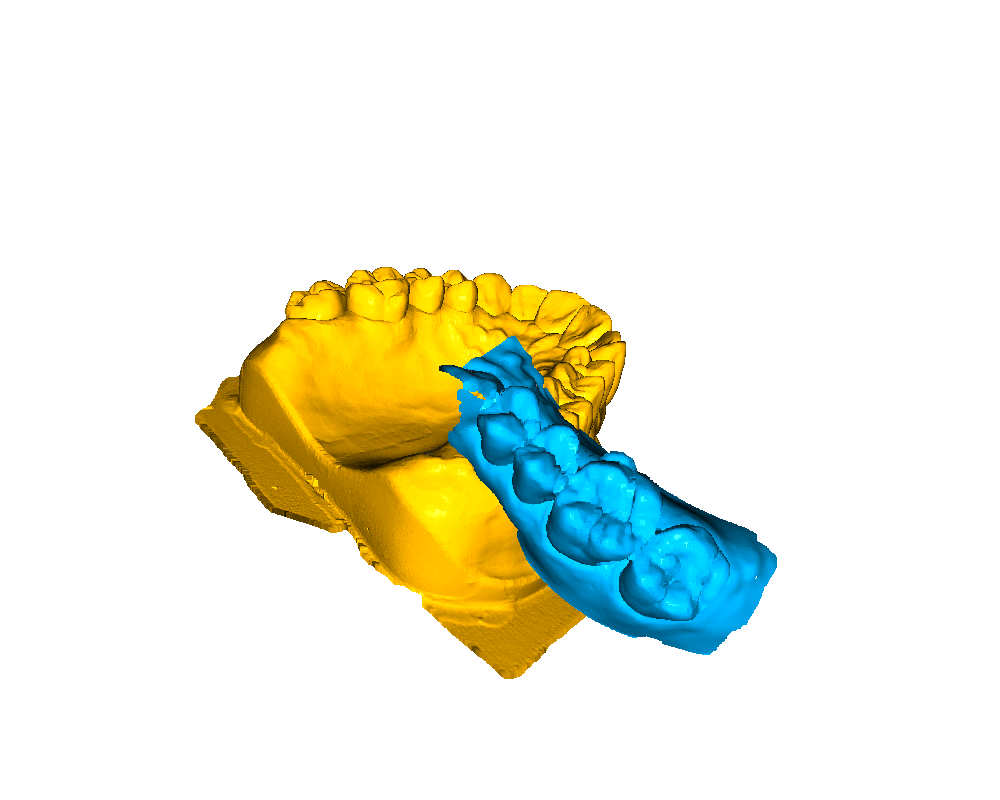

In [13]:
newpointcloud = temp_pcd.paint_uniform_color([1, 0.706, 0])+list_stitches[1].paint_uniform_color([0, 0.651, 0.929])
custom_draw_geometry(newpointcloud,
                     mytitle = "both",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = False,
                     rotate = "interactive",
                     onewindow = True)
Im(filename=last_file(".png"),
  width = 500, height = 400) 

In [14]:
list_stitches = [temp_pcd,st_pcd]

In [16]:
downsampled_stitches = downsample_list_stitches(list_stitches,
                                                labels_stitches,color_stitches , 
                                                voxel_size = 0.3,
                                                take_screen_shot = False,
                                                visualization_on = True,
                                                print_statements = True)


Downsampled_model_pc
[Open3D WARNING] GLFW Error: The GLFW library is not initialized
Downsampled_model_pc
number of points original :  3379896
number of points with voxel down sample : 86880

Downsampled_stitched_pc
[Open3D WARNING] GLFW Error: The GLFW library is not initialized
Downsampled_stitched_pc
number of points original :  488502
number of points with voxel down sample : 17942



13012021-01h27m54s
allpc_downsampled_model_pc_stitched_pc
removing outliers
[Open3D WARNING] GLFW Error: The GLFW library is not initialized

GLOBAL REGISTRATION: RANSAC registration on downsampled point clouds.
Transformation is:
[[-9.57132307e-01 -2.74682247e-01 -9.19097906e-02 -2.29713789e+01]
 [ 2.71837012e-01 -9.61408389e-01  4.24093050e-02 -2.93320053e+01]
 [-1.00011927e-01  1.56068331e-02  9.94863831e-01 -7.20382356e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
overlapping points :  3
RegistrationResult with fitness=1.000333e-03, inlier_rmse=6.061474e-02, and correspondence_set size of 3
Access transformation to get result.

POINT-TO-PLANE ICP registration is applied on original point
distance threshold 0.400.
Transformation is:
[[-9.81556062e-01 -1.66699845e-01 -9.35887782e-02 -1.93399609e+01]
 [ 1.68121371e-01 -9.85738076e-01 -7.45994020e-03 -2.92259948e+01]
 [-9.10104512e-02 -2.30566233e-02  9.95582990e-01 -7.91145055e+00]
 [ 0.00000000e+00  0.00000

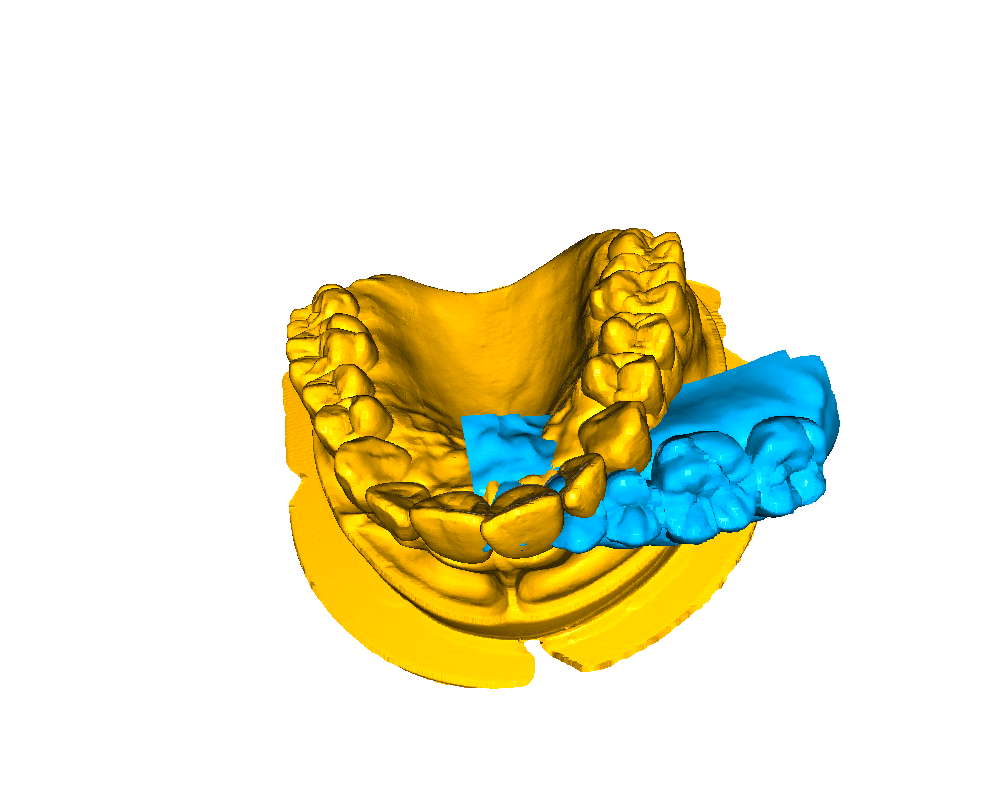

In [24]:
# timestamp
now = datetime.now()
dt_string = now.strftime("%d%m%Y-%Hh%Mm%Ss")
print(dt_string)

# initialize 
voxel_size  =0.2 # with 0.1 doesnt work!
i = 0
j = 1
source_label = labels_stitches[i]
target_label =labels_stitches[j]

source = list_stitches[i]
target = list_stitches[j]

processed_source = downsampled_stitches[i]
processed_target = downsampled_stitches[j]

mytitle= dt_string+"-%s_%s"%(source_label,target_label)
start = timer()

#MAIN
source_output, target_output, transformation_1 = stitch_sequences(processed_source,processed_target,
                                                  source_label,target_label,
                                                  mmax_iteration = 10**7,
                                                  mmax_validation = 0.999,
                                                  print_statements = True, 
                                                  visualization_on = True  
                                                 )

end = timer()
print (f"duration: {end-start}")
draw_registration_result(source_output, target_output, transformation_1, title = dt_string+"Downsampled Registration results")


## apply transformation on original 
draw_registration_result(source, target, transformation_1, title = dt_string+"Full Registration results")

Im(filename=last_file(".png"),
  width = 500, height = 400) 

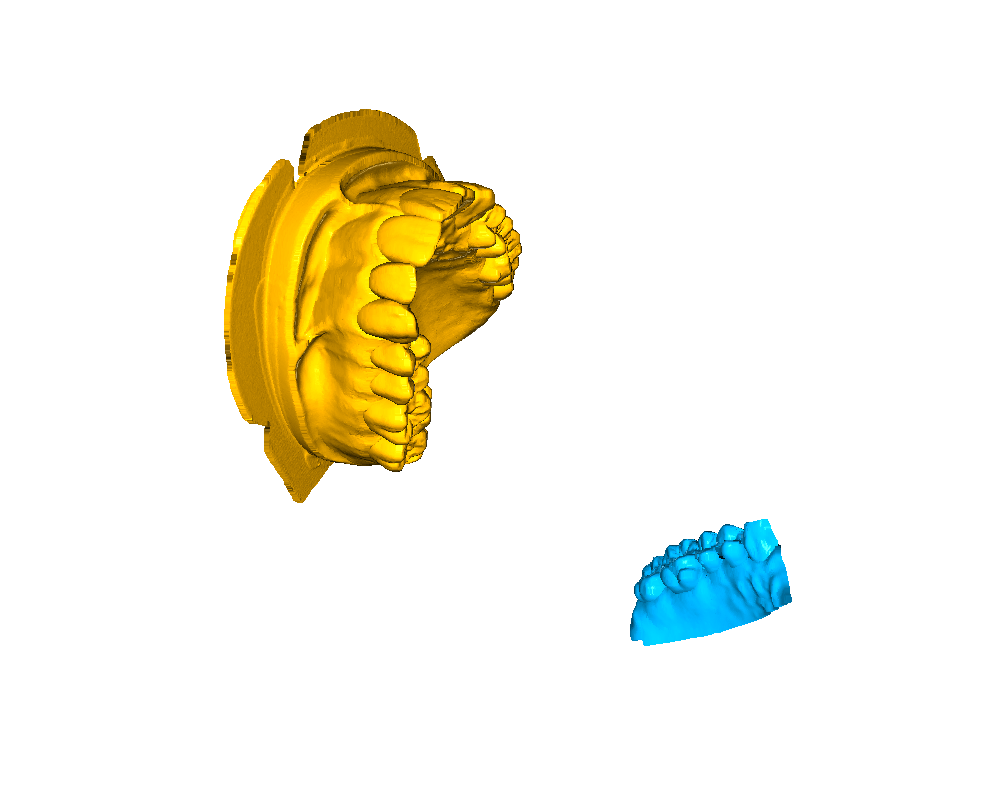

In [28]:
## apply transformation on original 
draw_registration_result(source, target, trasnf_model_to_pc, title = dt_string+"Full Registration results")

Im(filename=last_file(".png"),
  width = 500, height = 400) 

In [27]:
# transformation from the model to the pc

trasnf_model_to_pc = np.array([[ 0.30225325,  0.5357566 ,  0.78842111, -0.06576513],
                           [-0.75569395, -0.36945846,  0.54076528, -0.06627607],
                           [-0.58100742,  0.75925313, -0.293198  ,  0.06292668],
                           [ 0.        ,  0.        ,  0.        ,  1.        ]])

## Bin

## check coordinates points

In [ ]:
all_points_pcd = np.asarray(temp_pcd.points)
all_points_pcd[:10]

In [ ]:
# we select points from our point cloud
selected_points = pick_points(st_pcd)
coordinates_points_st_pcl= [list(np.asarray(st_pcd.points)[selected_points[i]]) for i in range(len(selected_points))]

In [ ]:
# check the coordinates
coordinates_points_st_pcl = list(coordinates_points_st_pcl)
for point in coordinates_points_st_pcl:
    print (point)

In [ ]:
#search for this points in the original model 
# its a lot of points, with 3 coordinates each... lets focus on the first coordinate AND make a set
all_points_pcd = np.asarray(pcd.points)
all_points_pcd_x = [all_points_pcd[i][0] for i in range(len(all_points_pcd))]

In [ ]:
set_all_points_pcd_x = set(all_points_pcd_x[100934:100939])
-0.02383452281355858 in set_all_points_pcd_x

In [ ]:
matches = [point[0] for point in coordinates_points_st_pcl if point[0] in set_all_points_pcd_x]

In [ ]:
matches